<a href="https://colab.research.google.com/github/adonaiarruda/lighthouse_ds_case/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

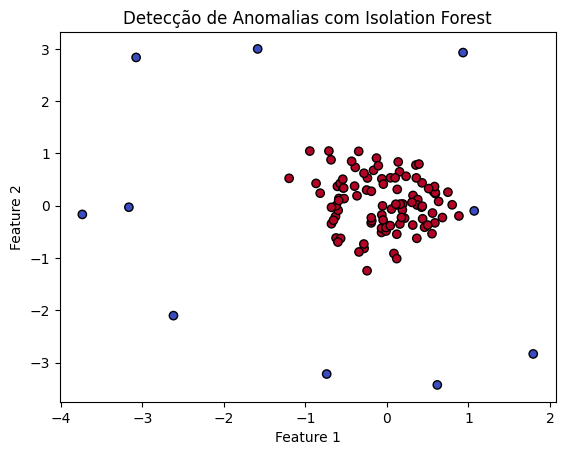

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Gerando dados normais
X = 0.5 * np.random.randn(100, 2)
X_outliers = np.random.uniform(low=-4, high=4, size=(10, 2))
X = np.vstack((X, X_outliers))

# Treinando o modelo Isolation Forest
iso_forest = IsolationForest(contamination=0.09, random_state=42)
y_pred = iso_forest.fit_predict(X)

# Plotando os resultados
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="coolwarm", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Detecção de Anomalias com Isolation Forest")
plt.show()


In [2]:
X

array([[ 3.20418885e-01,  1.96645620e-01],
       [-8.68591299e-01,  4.26850363e-01],
       [ 2.41776298e-02, -3.80667559e-01],
       [ 5.72996466e-01,  2.68224747e-01],
       [ 1.55328074e-01,  6.49192588e-01],
       [ 3.78793238e-01,  1.17233166e-01],
       [-6.56031362e-02, -5.10942039e-01],
       [ 5.52971686e-01, -5.34459871e-01],
       [ 5.59404684e-01, -1.40039918e-01],
       [ 2.17538435e-01, -2.38274777e-01],
       [-6.30026492e-01, -2.05688266e-01],
       [ 5.94465455e-01,  2.32369225e-01],
       [ 5.55988111e-01,  3.29900372e-01],
       [-6.23542673e-01, -6.16667500e-01],
       [ 1.07062820e+00, -9.86289313e-02],
       [-6.21357204e-02,  5.13914013e-01],
       [-5.32164949e-02, -2.66032800e-03],
       [-1.19890747e+00,  5.24035149e-01],
       [ 1.95388625e-01,  3.34736368e-02],
       [-2.48331864e-01,  3.00222863e-01],
       [ 1.14709209e-01,  1.44887190e-02],
       [ 1.89583513e-01, -8.08918256e-02],
       [ 8.00423908e-01,  1.77046670e-02],
       [-6.

# Desafio Ciência de Dados Lighthouse

## Importar bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Importar dados

In [4]:
!mkdir dataset
!wget https://raw.githubusercontent.com/adonaiarruda/lighthouse_ds_case/development/dataset/teste_indicium_precificacao.csv -O dataset/teste_indicium_precificacao.csv

--2025-01-30 12:46:38--  https://raw.githubusercontent.com/adonaiarruda/lighthouse_ds_case/development/dataset/teste_indicium_precificacao.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077542 (6.7M) [text/plain]
Saving to: ‘dataset/teste_indicium_precificacao.csv’

dataset/teste_indic 100%[===================>]   6.75M  43.5MB/s    in 0.2s    

2025-01-30 12:46:39 (43.5 MB/s) - ‘dataset/teste_indicium_precificacao.csv’ saved [7077542/7077542]



In [5]:
!mkdir token
!wget https://raw.githubusercontent.com/adonaiarruda/lighthouse_ds_case/development/token/mapbox_token -O token/mapbox_token

--2025-01-30 12:46:40--  https://raw.githubusercontent.com/adonaiarruda/lighthouse_ds_case/development/token/mapbox_token
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97 [text/plain]
Saving to: ‘token/mapbox_token’

token/mapbox_token  100%[===================>]      97  --.-KB/s    in 0s      

2025-01-30 12:46:40 (1.44 MB/s) - ‘token/mapbox_token’ saved [97/97]



In [6]:
indicium_df = pd.read_csv('dataset/teste_indicium_precificacao.csv')

In [7]:
indicium_df.head()

id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0  Entire home/apt    225              1                 45    2019-05-21   
1     Private room    150              3                  0           NaN   
2  Entire home/apt     89              1                270    2019-07-05   
3  Entire home/apt     80             10                  9    2018-11-19   
4  Entire home/apt    200              3                 74    2019-06-22   

   reviews_por_mes  calculado_host_listings_count  disponibilidade_365  
0             0.38                              2                  355  
1              NaN                              1                  365  
2             4.64                              1                  194  
3             0.10                              1                    0  
4             0.59                              1                  129

In [8]:
indicium_df.describe()

id       host_id      latitude     longitude         price  \
count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimo_noites  numero_de_reviews  reviews_por_mes  \
count   48894.000000       48894.000000     38842.000000   
mean        7.030085          23.274758         1.373251   
std        20.510741          44.550991         1.680453   
min         1.000000           0.000000         0.010000   
25%         1.000000           1.000000         0.190000   
50%         3.000000           5.000000         0.720000   
75%         5.000000          24.000000         2.020000   
max      1250.000000         629.000000        58.500000   

       calculado_host_listings_count  disponibilidade_365  
count                   48894.000000         48894.000000  
mean                        7.144005           112.776169  
std                        32.952855           131.618692  
min                         1.000000             0.000000  
25%                         1.000000             0.000000  
50%                         1.000000            45.000000  
75%                         2.000000           227.000000  
max                       327.000000           365.000000

In [9]:
indicium_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

## Limpeza de dados

In [42]:
# Remover preços zerados
indicium_df_clean = indicium_df[indicium_df['price'] > 0]
indicium_df_clean.describe()

id       host_id      latitude     longitude         price  \
count  4.888300e+04  4.888300e+04  48883.000000  48883.000000  48883.000000   
mean   1.901718e+07  6.762342e+07     40.728954    -73.952175    152.755130   
std    1.098409e+07  7.861687e+07      0.054531      0.046159    240.172716   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420     10.000000   
25%    9.470616e+06  7.819574e+06     40.690100    -73.983080     69.000000   
50%    1.967574e+07  3.079382e+07     40.723080    -73.955680    106.000000   
75%    2.915303e+07  1.074344e+08     40.763120    -73.936290    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimo_noites  numero_de_reviews  reviews_por_mes  \
count   48883.000000       48883.000000     38832.000000   
mean        7.030010          23.272283         1.373158   
std        20.512416          44.551739         1.680402   
min         1.000000           0.000000         0.010000   
25%         1.000000           1.000000         0.190000   
50%         3.000000           5.000000         0.720000   
75%         5.000000          24.000000         2.020000   
max      1250.000000         629.000000        58.500000   

       calculado_host_listings_count  disponibilidade_365     log_price  
count                   48883.000000         48883.000000  48883.000000  
mean                        7.144652           112.774339      4.737945  
std                        32.956522           131.623674      0.691788  
min                         1.000000             0.000000      2.397895  
25%                         1.000000             0.000000      4.248495  
50%                         1.000000            45.000000      4.672829  
75%                         2.000000           227.000000      5.170484  
max                       327.000000           365.000000      9.210440

## Análise Exploratória de Dados (EDA)

### Mapping

In [43]:
px.set_mapbox_access_token(open("token/mapbox_token").read())

fig = px.scatter_mapbox(indicium_df_clean, lat="latitude", lon="longitude", color="room_type", size="price",
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15, zoom=10, opacity=0.7)

fig.update_layout(height=800, mapbox=dict(center=go.layout.mapbox.Center(
                  lat=40.77227,
                  lon=-73.94277)),
                  template='plotly_dark')
fig.show()

Utilizando um mapa interativo, onde a cor dos pontos é o tipo de espaço e o tamanho é o preço por noite dos anúncios, é possível perceber maior concentração de anúncios em Manhattan e o tipo de espaço com maior quantiddade de anúncios é de apartamento inteiro. Além disso, os maiores preços se encontram na região sul de Manhattan.

### Estatística descritiva

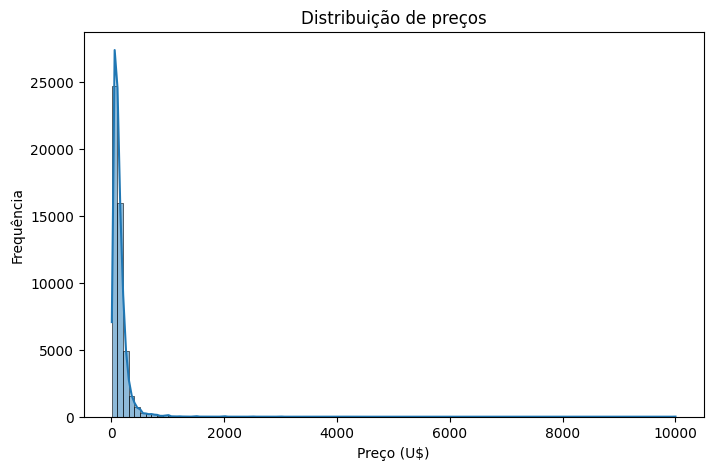

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(indicium_df_clean['price'], bins=100, kde=True)
plt.title("Distribuição de preços")
plt.xlabel("Preço (U$)")
plt.ylabel("Frequência")
plt.show()

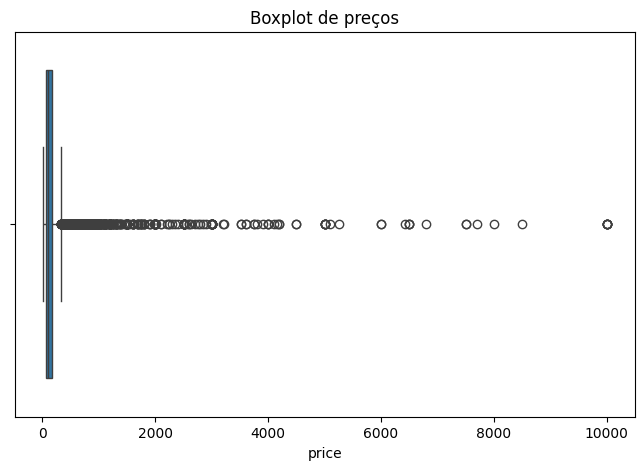

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(x=indicium_df_clean['price'])
plt.title("Boxplot de preços")
plt.show()

É possível perceber assimétria a direita na distribuição de preços. Ou seja, uma alta concentração de anúncios de baixo preço e poucos anúncios de preço muito alto. Um transformação logarítimica pode transformar este tipo de dados em uma distribuição com maior simetria.



<ipython-input-75-ca0e01a76a8c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='log_price', ylabel='Count'>

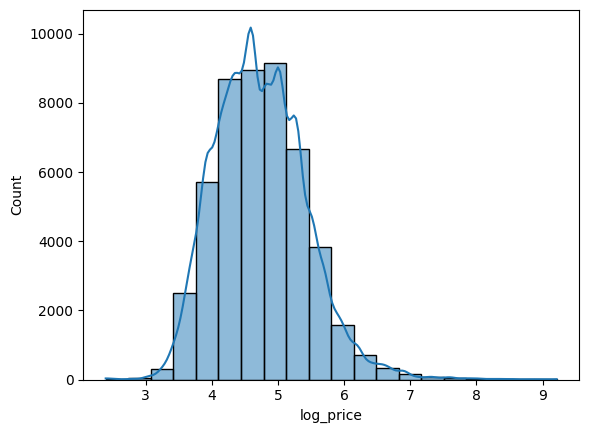

In [75]:
# Transformação logarítimica do preço
indicium_df_clean['log_price'] = np.log1p(indicium_df_clean['price'])

sns.histplot(indicium_df_clean['log_price'], bins=20, kde=True)

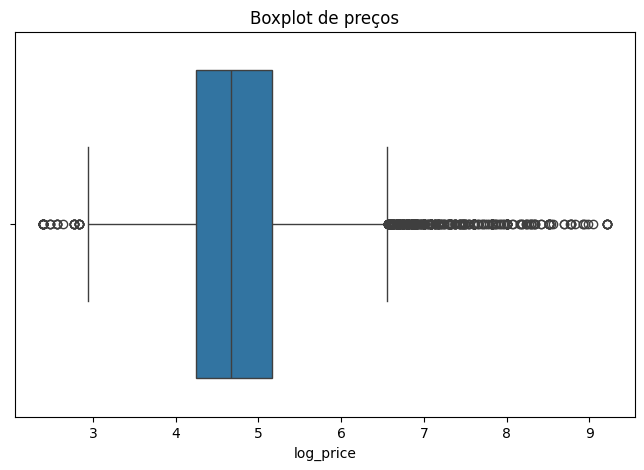

In [47]:
plt.figure(figsize=(8,5))
sns.boxplot(x=indicium_df_clean['log_price'])
plt.title("Boxplot de preços")
plt.show()

In [93]:
# Grouped stacked bar chart
df_bairro_tipo = indicium_df_clean.groupby(['bairro_group', 'room_type']).size().reset_index(name='quantidade')
fig = px.bar(df_bairro_tipo, x='bairro_group', y='quantidade', color='room_type', barmode='stack',
             title='Quantidade de anúncios por bairro e tipo de quarto',
             labels={'bairro_group': 'Região', 'quantidade': 'Quantidade', 'room_type': 'Tipo de Quarto'})
fig.show()

Pode-se notar que as regiões Brooklyn e Manhattan possuem maior quantidade de anúncios. Além disso, anúncios do tipo apartamento inteiro e espaço privado são predominantes em todas as regiões.

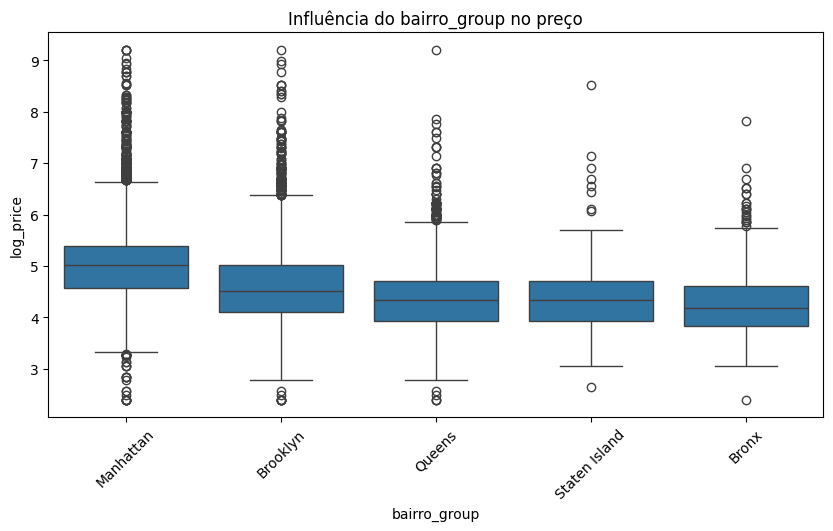

In [95]:
plt.figure(figsize=(10,5))
sns.boxplot(x=indicium_df_clean['bairro_group'], y=indicium_df_clean['log_price'])
plt.title("Influência do bairro_group no preço")
plt.xticks(rotation=45)
plt.show()


Verifica-se que Manhattan é a região mais valorizada entre as 5.

In [102]:
indicium_df_clean['bairro'].value_counts()

bairro
Williamsburg          3919
Bedford-Stuyvesant    3710
Harlem                2658
Bushwick              2462
Upper West Side       1971
                      ... 
Richmondtown             1
New Dorp                 1
Rossville                1
Woodrow                  1
Willowbrook              1
Name: count, Length: 221, dtype: int64

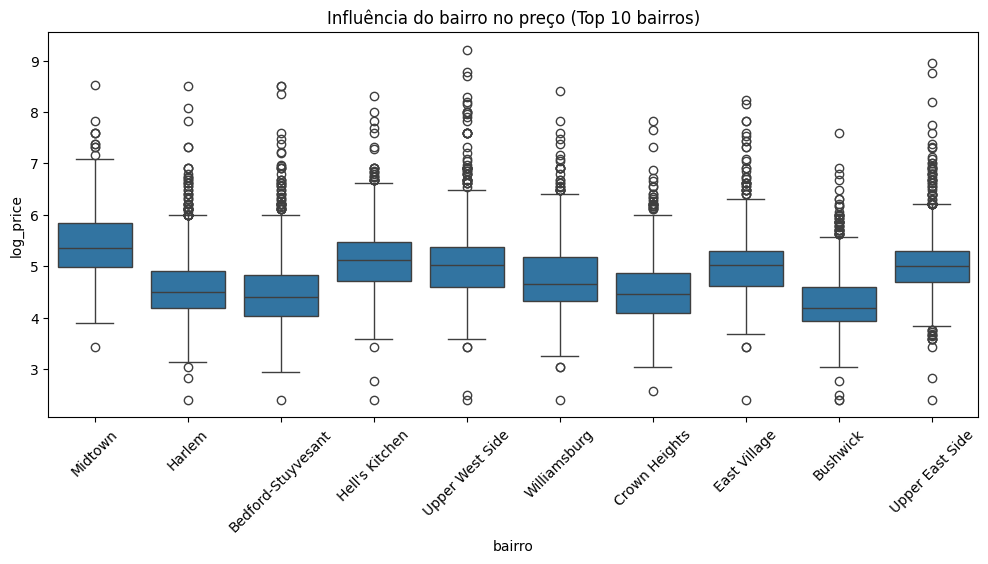

In [100]:
# Influência do bairro no preço (top 10 bairros mais comuns)
top_bairros = indicium_df_clean['bairro'].value_counts().index[:10]
df_top_bairros = indicium_df_clean[indicium_df_clean['bairro'].isin(top_bairros)]
plt.figure(figsize=(12,5))
sns.boxplot(x=df_top_bairros['bairro'], y=df_top_bairros['log_price'])
plt.title("Influência do bairro no preço (Top 10 bairros)")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='minimo_noites'>

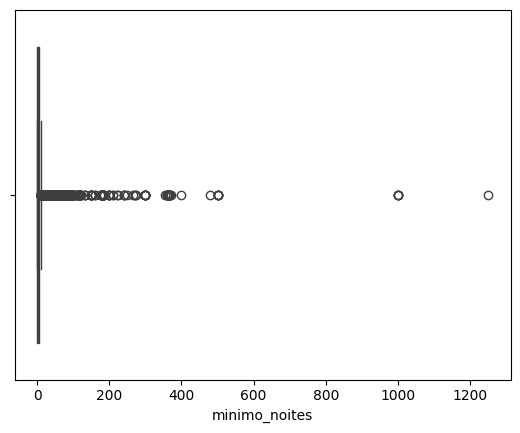

In [79]:
# indicium_df_clean['minimo_noites'].hist()
sns.boxplot(x=indicium_df_clean['minimo_noites'])

<ipython-input-83-cf864e71ecbc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='reviews_por_mes', ylabel='Count'>

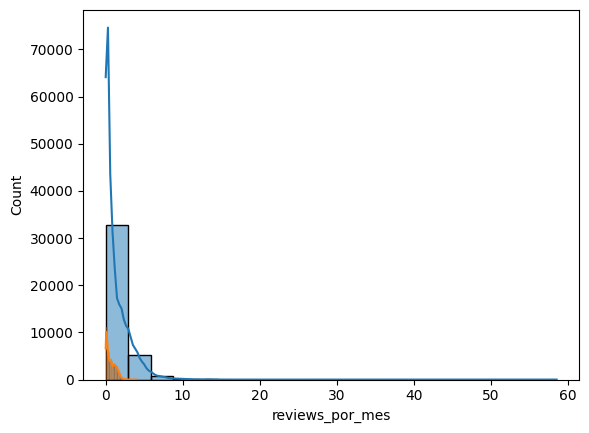

In [83]:
indicium_df_clean['log_n'] = np.log1p(indicium_df_clean['reviews_por_mes'])

sns.histplot(indicium_df_clean['reviews_por_mes'], bins=20, kde=True)
sns.histplot(indicium_df_clean['log_n'], bins=20, kde=True)

<Axes: xlabel='log_n'>

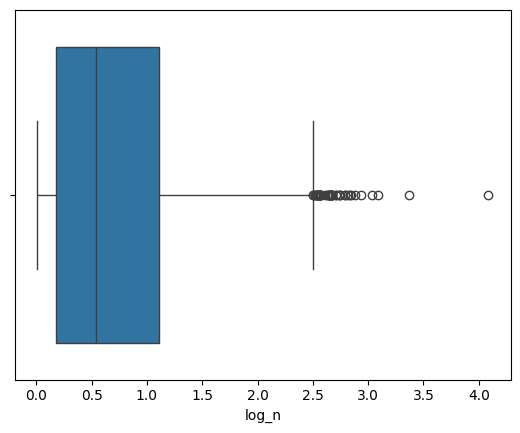

In [85]:
sns.boxplot(x=indicium_df_clean['log_n'])

In [15]:
indicium_df['bairro'].value_counts()

bairro
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

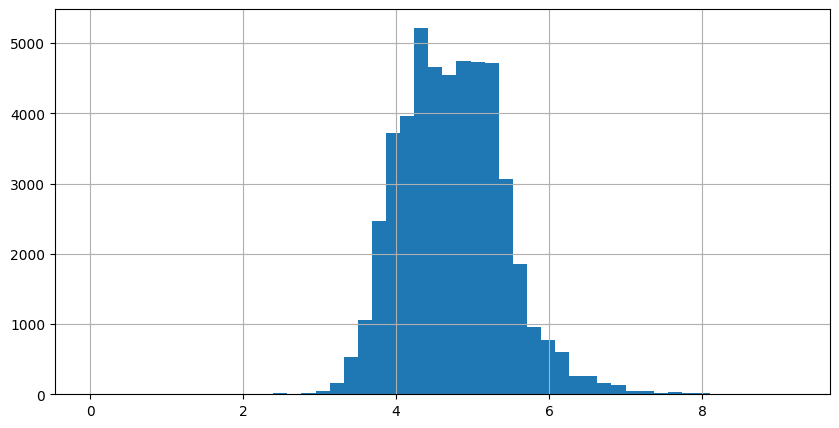

In [17]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Assuming indicium_df is already loaded as in the provided code

# Create a log transformation of the price
indicium_df['log_price'] = np.log1p(indicium_df['price'])


# Recalculate the histogram with the log transformed prices
histograma = indicium_df['log_price'].hist(bins=50, figsize=(10, 5))



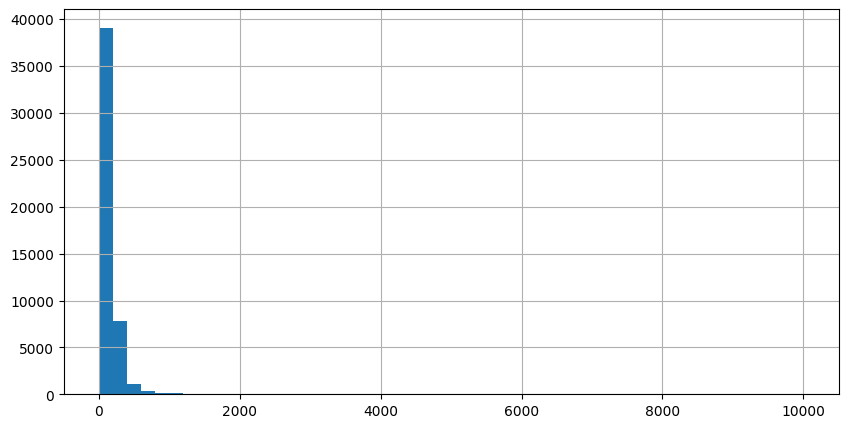

In [18]:
histograma = indicium_df['price'].hist(bins=50, figsize=(10, 5))

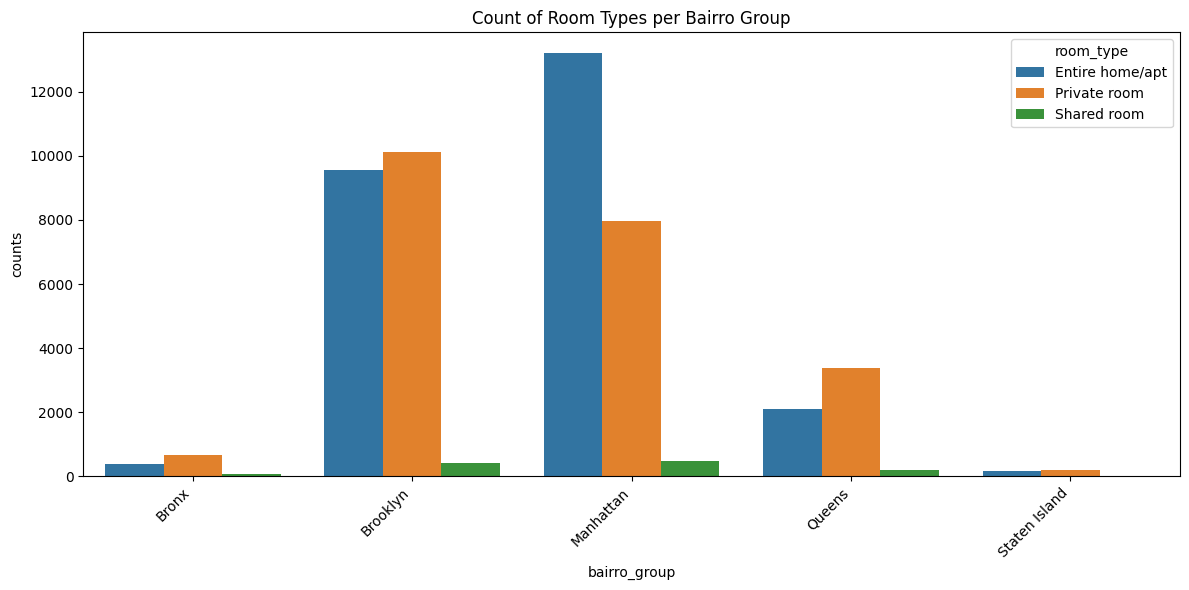

In [12]:
# prompt: group_by bairro_group and room_type. Count values and make a bar graph. Show number on graph

# Group data by 'bairro_group' and 'room_type', then count occurrences
grouped_data = indicium_df.groupby(['bairro_group', 'room_type']).size().reset_index(name='counts')

# Create the bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='bairro_group', y='counts', hue='room_type', data=grouped_data, estimator=sum)
plt.title('Count of Room Types per Bairro Group')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

# Draft

- Fazer gráfico comparando preço com cada variável.

- Ver distribuição de preço por região


- O melhor AP é aquele que fica menos tempo disponível.
- O retorno é o tempo que ele fica alocado x preço. O melhor bairro é onde tem maior retorno médio.


- Se só tenho variavel categórica, da apra fazer um modelo de machine learning só com variável categórica?



- Comparar modelos (reg logistica, grad boosting, reg linear, arvore)





- no mapa: preciso fazer algum log dos preços

In [19]:
df = pd.read_csv("dataset/teste_indicium_precificacao.csv")

In [20]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)  # Nova York
heat_data = df[['latitude', 'longitude', 'price']].values.tolist()
HeatMap(heat_data).add_to(m)
m

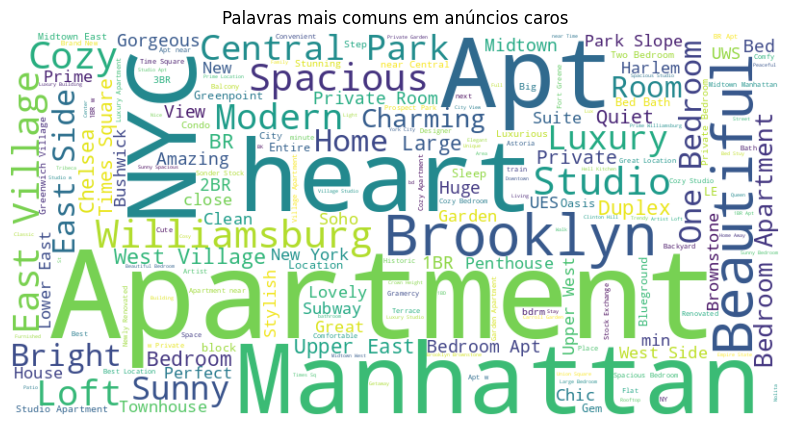

In [87]:
### **7️⃣ Processamento de Texto**
from wordcloud import WordCloud
text = " ".join(indicium_df_clean[indicium_df_clean['log_price'] > indicium_df_clean['log_price'].median()]['nome'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Palavras mais comuns em anúncios caros")
plt.show()

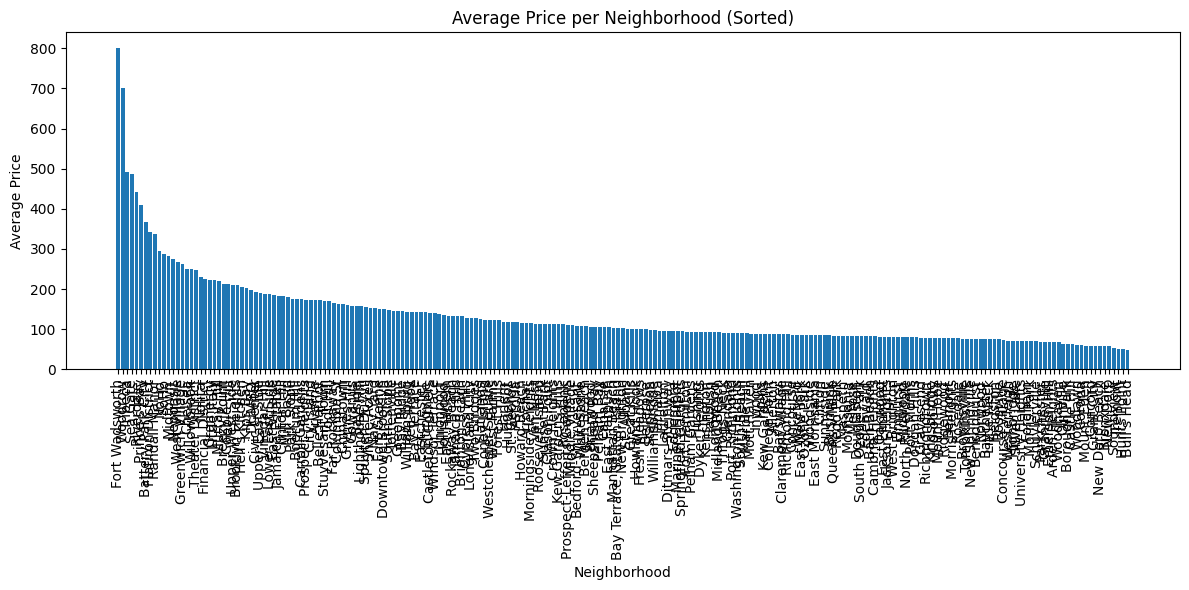

In [90]:
# prompt: verificar média de preço por bairro e ordenar bairros mais caros. plotar um histograma

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming indicium_df is already loaded as in the provided code
df = pd.read_csv("dataset/teste_indicium_precificacao.csv")

# Calculate the average price per neighborhood
average_price_per_neighborhood = df.groupby('bairro')['price'].mean().sort_values(ascending=False)

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(average_price_per_neighborhood.index, average_price_per_neighborhood.values)
plt.xlabel("Neighborhood")
plt.ylabel("Average Price")
plt.title("Average Price per Neighborhood (Sorted)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [24]:
text

'Skylit Midtown Castle THE VILLAGE OF HARLEM....NEW YORK ! Large Cozy 1 BR Apartment In Midtown East Cute & Cozy Lower East Side 1 bdrm Beautiful 1br on Upper West Side West Village Nest - Superhost Only 2 stops to Manhattan studio Perfect for Your Parents + Garden Chelsea Perfect Huge 2 BR Upper East  Cental Park Sweet and Spacious Brooklyn Loft CBG CtyBGd HelpsHaiti rm#1:1-4 CBG Helps Haiti Rm #2 MAISON DES SIRENES1,bohemian apartment Midtown Pied-a-terre Modern 1 BR / NYC / EAST VILLAGE Country space in the city Beautiful Sunny Park Slope Brooklyn 1bdr w private bath. in lofty apt West Side Retreat BEST BET IN HARLEM Entire apartment in central Brooklyn neighborhood. 1 Stop fr. Manhattan! Private Suite,Landmark Block Charming Brownstone 3 - Near PRATT bright and stylish duplex Cozy 1BD on Central Park West in New York City * ORIGINAL BROOKLYN LOFT * Greenpoint Place...Has It All!  Beautiful Apartment in Manhattan!!! Williamsburg 1 bedroom Apartment Great Location, Manhattan Bedroom!

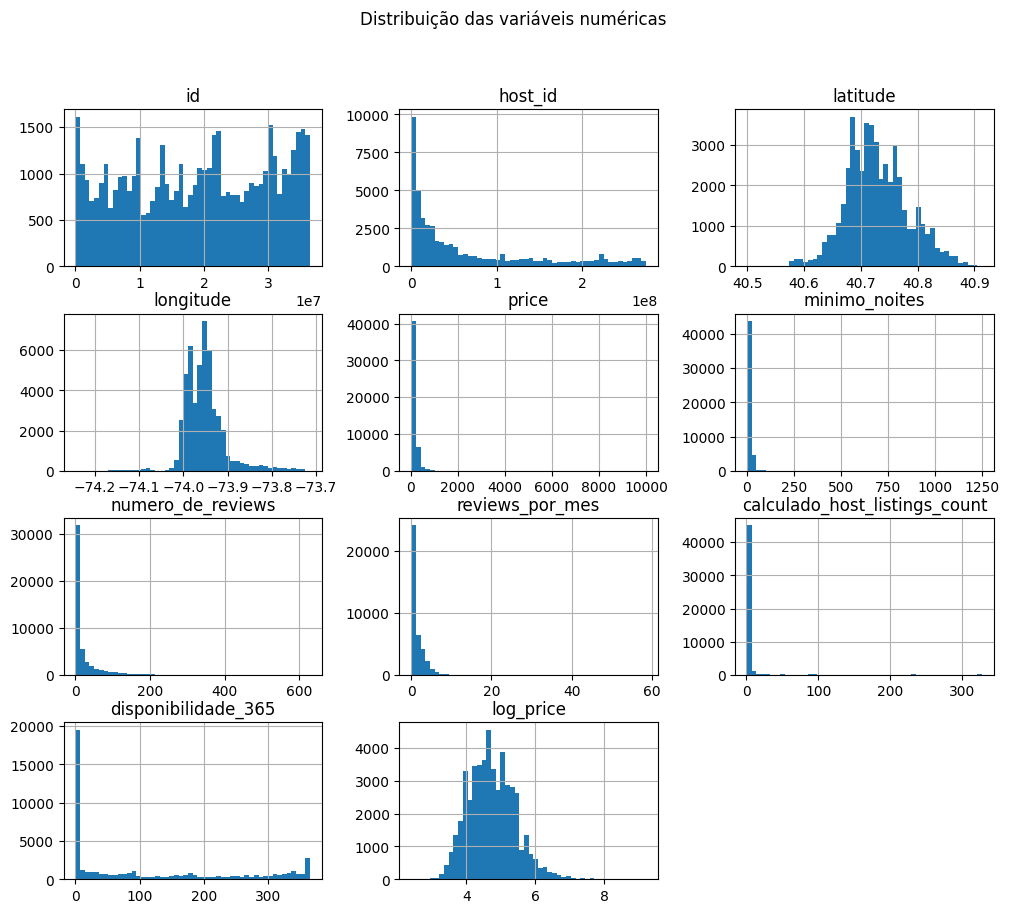

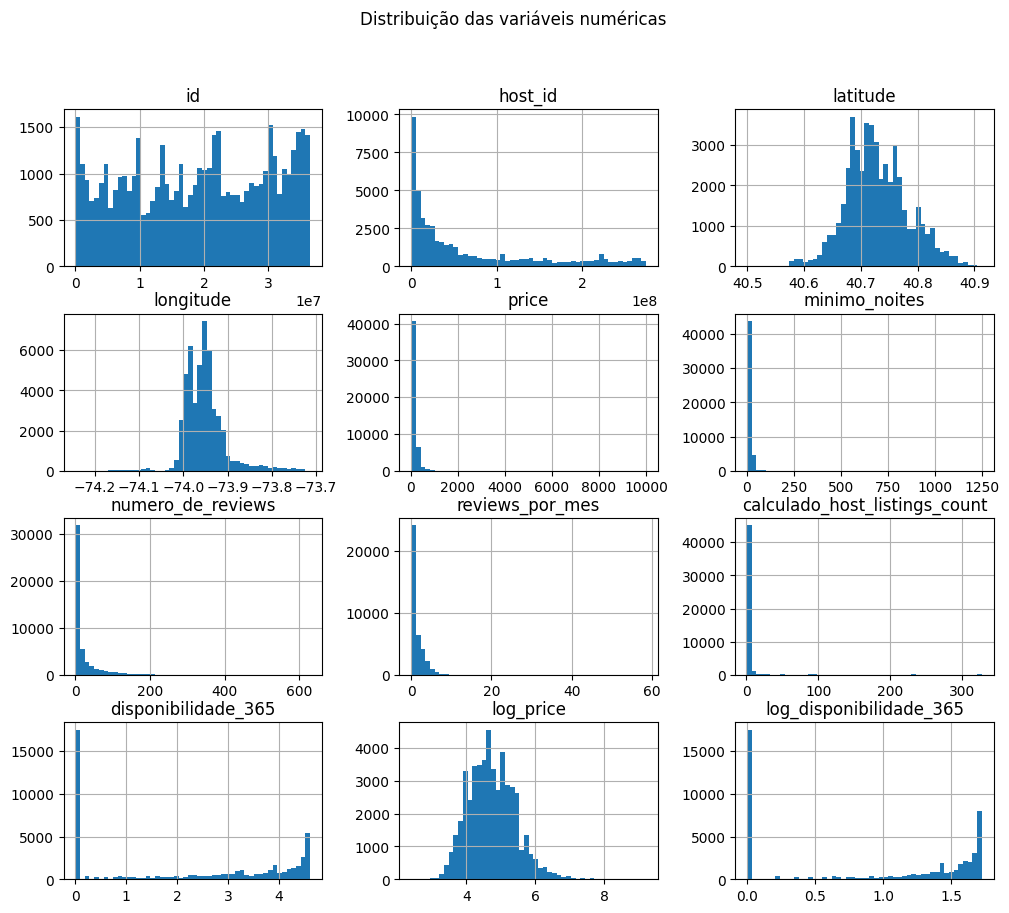

In [63]:
# prompt: todas variáveis numericas

import matplotlib.pyplot as plt

# Assuming indicium_df_clean is already defined as in the provided code

# Select only numeric columns
numeric_cols = indicium_df_clean.select_dtypes(include=['number'])

# Create histograms for all numeric columns
numeric_cols.hist(figsize=(12, 10), bins=50)
plt.suptitle("Distribuição das variáveis numéricas")
plt.show()

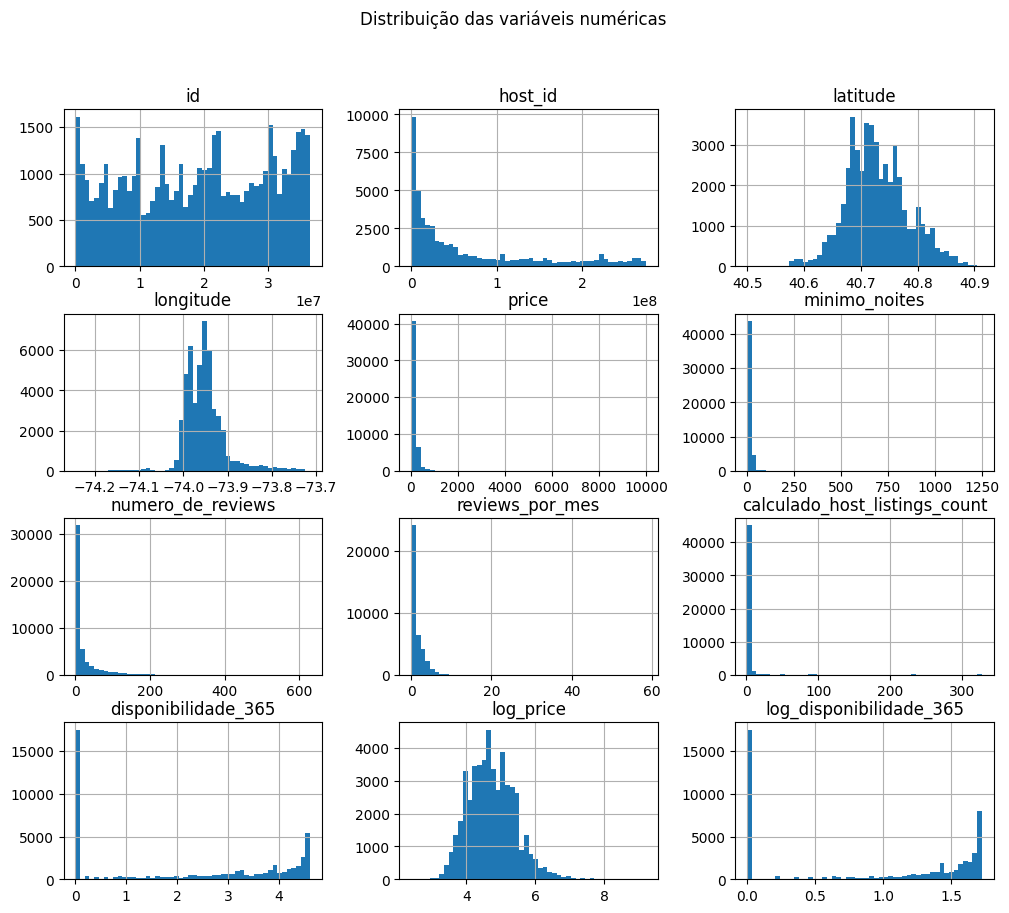

In [76]:

indicium_df_clean.hist(figsize=(12, 10), bins=50)
plt.suptitle("Distribuição das variáveis numéricas")
plt.show()